# DSE210 Worksheet 4 Question 6
https://drive.google.com/file/d/0BxK4UNZY50IFNVRRRG5iVnNMbE5MVWpnZ2t6NDBlYXd2M3dj/view

> There is a dormitory with n beds for n students. One night the power goes out, and because it is dark, each student gets into a bed chosen uniformly at random. What is the expected number of students who end up in their own bed?

I had trouble believing the analytical solution that only 1 student would be expected to find their original bed. So-- armed with the power of Python-- I figured I would code it and see if a Monte Carlo would come up with the same answer.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from numpy.random import permutation

In [3]:
NUM_BEDS = 20   # Number of people/Number of beds
NUM_TRIALS = 10000  # Number of times to rerun the experiment

In [4]:
originalBeds = range(1,NUM_BEDS)

In [5]:
beds = np.matrix(permutation(originalBeds))

In [6]:
for i in range(NUM_TRIALS):
    newBeds = permutation(originalBeds)
    beds = np.append(beds, np.matrix(newBeds), axis=0)

In [7]:
beds

matrix([[ 5, 12, 15, ...,  2,  9, 17],
        [ 1, 18, 17, ..., 19,  8, 12],
        [16,  9, 13, ..., 19, 12,  8],
        ..., 
        [15, 19,  9, ...,  4, 14, 10],
        [10,  4, 13, ...,  6,  8, 17],
        [ 6,  5,  1, ..., 17, 14,  8]])

In [8]:
foundOwnBed = ((beds - originalBeds) == 0) 

In [9]:
numFound = np.ravel((np.squeeze(foundOwnBed.sum(axis=1)))) # Sum per trial of how many students found their original bed

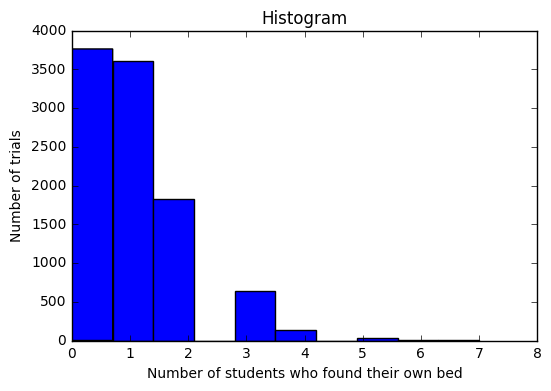

In [15]:
plt.hist(numFound)
plt.title('Histogram')
plt.xlabel('Number of students who found their own bed')
plt.ylabel('Number of trials')
plt.show()

In [11]:
numFound

array([3, 2, 1, ..., 0, 1, 2])

In [12]:
averageFoundBed = np.mean(numFound)
print("On average {} person(s) found their original bed.".format(averageFoundBed))

On average 0.9891010898910109 person(s) found their original bed.
